In [1]:
%matplotlib inline

Show layers of the ImageContainer
=================================

This example shows how to use `squidpy.im.ImageContainer.show`.

This function is useful to visualize statically different layers of the
`squidpy.im.ImageContainer` class.

::: {.seealso}
-   See `sphx_glr_auto_examples_image_compute_crops.py` and
    `sphx_glr_auto_examples_image_compute_smooth.py` for additional
    examples on methods of the `squidpy.im.ImageContainer`.
:::


In [2]:
import squidpy as sq

Load the Mibitof dataset.


In [3]:
adata = sq.datasets.mibitof()

In [4]:
adata

AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2'
    uns: 'Cluster_colors', 'batch_colors', 'neighbors', 'spatial', 'umap'
    obsm: 'X_scanorama', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [6]:
adata.obs

,row_num,point,cell_id,X1,center_rowcoord,center_colcoord,cell_size,category,donor,Cluster,batch,library_id
3034-0,3086,23,2,60316.0,269.0,7.0,408.0,carcinoma,21d7,Epithelial,0,point23
3035-0,3087,23,3,60317.0,294.0,6.0,408.0,carcinoma,21d7,Epithelial,0,point23
3036-0,3088,23,4,60318.0,338.0,4.0,304.0,carcinoma,21d7,Imm_other,0,point23
3037-0,3089,23,6,60320.0,372.0,6.0,219.0,carcinoma,21d7,Myeloid_CD11c,0,point23
3038-0,3090,23,8,60322.0,417.0,5.0,303.0,carcinoma,21d7,Myeloid_CD11c,0,point23
...,...,...,...,...,...,...,...,...,...,...,...,...
47342-2,48953,16,1103,2779.0,143.0,1016.0,283.0,carcinoma,90de,Fibroblast,2,point16
47343-2,48954,16,1104,2780.0,814.0,1017.0,147.0,carcinoma,90de,Fibroblast,2,point16
47344-2,48955,16,1105,2781.0,874.0,1018.0,142.0,carcinoma,90de,Imm_other,2,point16
47345-2,48956,16,1106,2782.0,257.0,1019.0,108.0,carcinoma,90de,Fibroblast,2,point16


We can briefly visualize the data to understand the type of images we
have.


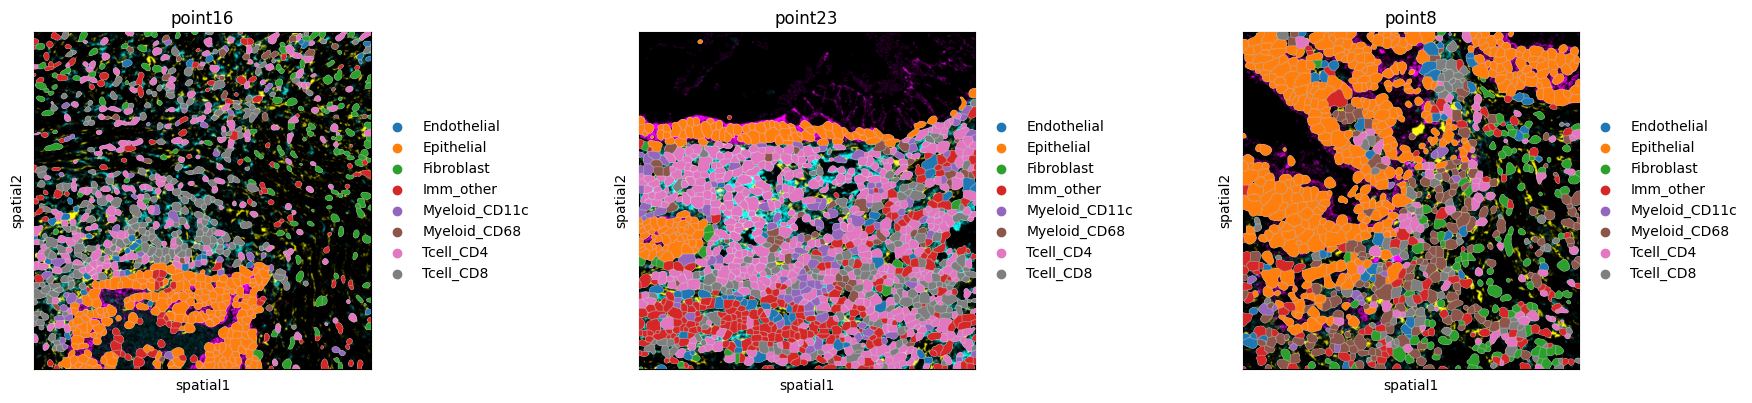

In [4]:
sq.pl.spatial_segment(
    adata,
    library_id=["point16", "point23", "point8"],
    seg_cell_id="cell_id",
    color="Cluster",
    library_key="library_id",
    title=["point16", "point23", "point8"],
)

We have three different tissue samples. We also have segmentation masks
for each tissue sample. Let\'s extract the image from the
`anndata.AnnData` object and create a `squidpy.im.ImageContainer`
object.


In [12]:
adata.uns.keys()

dict_keys(['Cluster_colors', 'batch_colors', 'neighbors', 'spatial', 'umap'])

In [15]:
adata.uns['spatial'].keys()

dict_keys(['point16', 'point23', 'point8'])

In [17]:
adata.uns['spatial']['point16'].keys()

dict_keys(['images', 'scalefactors'])

In [23]:
adata.uns['spatial']['point16']['images']['hires']

array([[[ 3,  3,  0],
        [ 2,  2,  0],
        [ 1,  1,  0],
        ...,
        [ 6, 15,  9],
        [ 2,  7,  5],
        [ 1,  3,  2]],

       [[ 5,  5,  0],
        [ 4,  4,  0],
        [ 2,  2,  0],
        ...,
        [ 6, 14,  7],
        [ 2,  6,  3],
        [ 1,  2,  1]],

       [[ 5,  5,  0],
        [ 4,  4,  0],
        [ 2,  2,  0],
        ...,
        [ 8, 15,  7],
        [ 3,  6,  2],
        [ 2,  3,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [5]:
imgs = []
for library_id in adata.uns["spatial"].keys():
    img = sq.im.ImageContainer(adata.uns["spatial"][library_id]["images"]["hires"], library_id=library_id)
    img.add_img(adata.uns["spatial"][library_id]["images"]["segmentation"], library_id=library_id, layer="segmentation")
    img["segmentation"].attrs["segmentation"] = True
    imgs.append(img)

In [6]:
imgs

[ImageContainer[shape=(1024, 1024), layers=['image', 'segmentation']],
 ImageContainer[shape=(1024, 1024), layers=['image', 'segmentation']],
 ImageContainer[shape=(1024, 1024), layers=['image', 'segmentation']]]

In [7]:
img = sq.im.ImageContainer.concat(imgs)

In [8]:
img

ImageContainer[shape=(1024, 1024), layers=['image', 'segmentation']]

We can visualize each image of the object with
`squidpy.im.ImageContainer.show`.


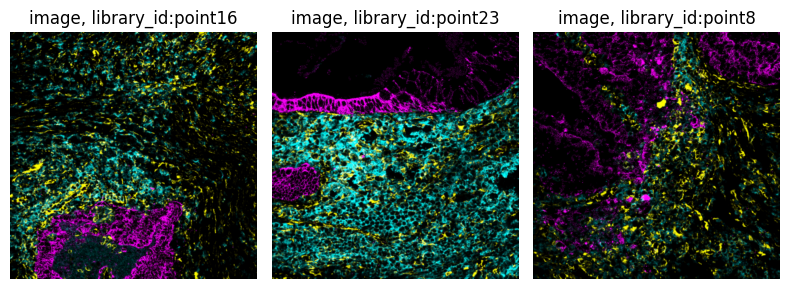

In [9]:
img.show("image")

`squidpy.im.ImageContainer.show` also allows to overlay the results of
segmentation.


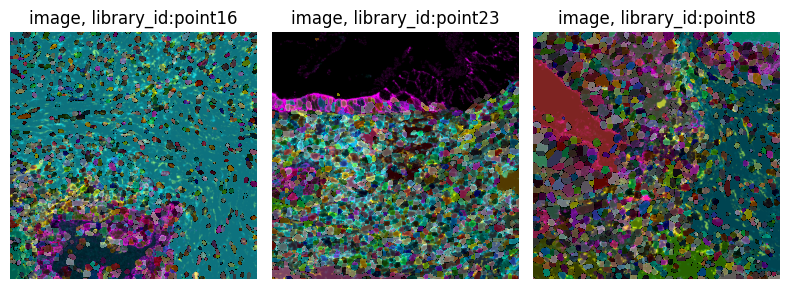

In [10]:
img.show("image", segmentation_layer="segmentation", segmentation_alpha=0.5)

> IDF: parameter experimentation

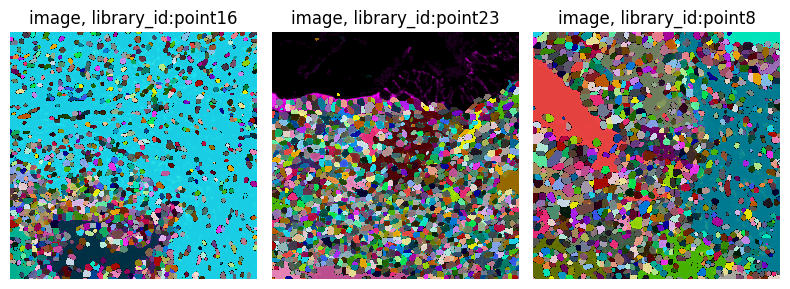

In [15]:
img.show("image", segmentation_layer="segmentation", segmentation_alpha=0.9)